<a href="https://colab.research.google.com/github/salwanaqwaa/SD3203-Teknologi-Basis-Data/blob/main/157_SALWA_NAQWADISA_RC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAMA : SALWA NAQWADISA MADINNA

NIM : 121450157

KELAS : TBD RC

# REIMPLEMENTASI ARTIKEL

Dataset yang akan digunakan disebut CIFAR-10, yang merupakan kumpulan gambar berwarna berukuran 32x32 piksel. Dataset ini mencakup 60.000 gambar yang termasuk dalam berbagai kelas objek seperti anjing, kucing, dan pesawat terbang. CIFAR-10 relatif kecil dibandingkan dengan dataset lainnya, seperti TinyImages yang membutuhkan 400GB ruang disk.

In [1]:
import numpy as np
import pickle
from pathlib import Path

# Path to the unzipped CIFAR data
data_dir = Path("data/cifar-10-batches-py/")

# Unpickle function provided by the CIFAR hosts
def unpickle(file):
    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding="bytes")
    return dict

images, labels = [], []
for batch in data_dir.glob("data_batch_*"):
    batch_data = unpickle(batch)
    for i, flat_im in enumerate(batch_data[b"data"]):
        im_channels = []
        # Each image is flattened, with channels in order of R, G, B
        for j in range(3):
            im_channels.append(
                flat_im[j * 1024 : (j + 1) * 1024].reshape((32, 32))
            )
        # Reconstruct the original image
        images.append(np.dstack((im_channels)))
        # Save the label
        labels.append(batch_data[b"labels"][i])

print("Loaded CIFAR-10 training set:")
print(f" - np.shape(images)     {np.shape(images)}")
print(f" - np.shape(labels)     {np.shape(labels)}")

Loaded CIFAR-10 training set:
 - np.shape(images)     (0,)
 - np.shape(labels)     (0,)


Langkah-Langkah :
1. Impor pustaka yang diperlukan: numpy untuk manipulasi data array, pickle untuk membaca file biner, dan Path dari modul pathlib untuk bekerja dengan path file.
2. Tentukan path ke direktori data CIFAR yang sudah di-unzip dan fungsi unpickle yang akan membuka file menggunakan pickle dan mengembalikan kamus yang berisi data CIFAR.
3. Buat dua list kosong untuk menyimpan gambar (images) dan label (labels).
Lakukan loop untuk setiap file batch dalam direktori data CIFAR.a. Buka file batch menggunakan fungsi unpickle.b.
4. Lakukan loop untuk setiap gambar dalam batch.i. Untuk setiap gambar, loop melalui tiga saluran warna (R, G, B).ii. Pisahkan setiap saluran warna dari gambar yang di-flatten dan bentuk kembali menjadi matriks 32x32.iii. Gabungkan ketiga saluran warna menjadi satu gambar menggunakan np.dstack.iv. Simpan gambar yang telah direkonstruksi ke dalam list images.v. Simpan label gambar ke dalam list labels.
5. Print informasi tentang dataset yang telah dimuat, yaitu bentuk (shape) dari images dan labels.


Pada program ini membaca dataset CIFAR-10 yang sudah di-unzip dari beberapa file batch. Setiap gambar dalam setiap batch di-flatten, kemudian dipecah menjadi saluran warna (R, G, B) dan direkonstruksi kembali menjadi gambar berukuran 32x32 piksel. Gambar-gambar dan label-labelnya disimpan dalam list images dan labels masing-masing.

## DISK

In [2]:
pip install Pillow

Fungsi "pip install Pillow" digunakan untuk menginstal Python Pillow, yang merupakan perpustakaan yang berguna untuk memanipulasi gambar dalam Python. Hal ini sering digunakan untuk membuka, menyimpan, dan melakukan berbagai operasi pada gambar, seperti mengubah ukuran, memutar, dan mengubah format file.

## LMBD

LMDB adalah penyimpanan kunci-nilai yang cepat dan efisien yang menggunakan file memori yang dipetakan. Ini menggunakan struktur pohon B+ untuk menyimpan data dan memaksimalkan efisiensi dengan menyesuaikan komponen kunci dengan ukuran halaman sistem operasi host. Penggunaan memori-mapping memungkinkan LMDB untuk mengembalikan pointer langsung ke alamat memori, menghindari kebutuhan untuk menyalin data, sehingga meningkatkan efisiensi dan kinerja.

In [6]:
pip install lmdb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 4.8 MB/s eta 0:00:00


Funsgi "pip install lmdb" untuk menginstal pustaka Python bernama lmdb. Pustaka ini memungkinkan pengguna untuk berinteraksi dengan LMDB (Lightning Memory-Mapped Database), sebuah basis data berkinerja tinggi yang menggunakan file memori yang dipetakan.
LMDB sering digunakan dalam aplikasi yang memerlukan akses cepat dan efisien ke data yang tersimpan dalam basis data. Biasanya digunakan dalam proyek-proyek yang membutuhkan penyimpanan data yang cepat, seperti yang harus memproses jumlah data yang besar.

## HDF5

HDF5 adalah format file yang digunakan untuk menyimpan data secara hierarkis. File-file HDF5 terdiri dari datasets (array multidimensi) dan grup-grup yang dapat berisi datasets atau grup-grup lainnya. Ini adalah format file yang populer di berbagai aplikasi ilmiah dan industri, termasuk proyek-proyek besar seperti yang dilakukan oleh NASA.

In [8]:
pip install h5py

Fungsi "pip install h5py" unutk menginstall Python bernama h5py, yang memberikan penggunaan untuk mengoperasikan file HDF5 dalam Python. Manfaat pada fungsi ini agar bisa melakukan berbagai operasi seperti membaca, menulis, dan mengolah dataset dalam file HDF5 menggunakan h5py.

## Storing a Single Image

Mencoba menggunakan dari ketiga metode yang sudah dijelaskan diatas

In [9]:
from pathlib import Path

disk_dir = Path("data/disk/")
lmdb_dir = Path("data/lmdb/")
hdf5_dir = Path("data/hdf5/")

In [10]:
disk_dir.mkdir(parents=True, exist_ok=True)
lmdb_dir.mkdir(parents=True, exist_ok=True)
hdf5_dir.mkdir(parents=True, exist_ok=True)

Fungsi dari kedua code diatas untuk membuat direktori atau folder di sistem file, dengan menggunakan "pathlib" untuk memanipulasi path file dan "mkdir" untuk membuat direktori baru dengan mudah.

## Menyimpan ke DISK

In [12]:
from PIL import Image
import csv

def store_single_disk(image, image_id, label):
    """ Stores a single image as a .png file on disk.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    Image.fromarray(image).save(disk_dir / f"{image_id}.png")

    with open(disk_dir / f"{image_id}.csv", "wt") as csvfile:
        writer = csv.writer(
            csvfile, delimiter=" ", quotechar="|", quoting=csv.QUOTE_MINIMAL
        )
        writer.writerow([label])

Fungsi store_single_disk mengizinkan penyimpanan satu gambar ke disk dalam format .png dan menyertakan metadata (label) dalam file .csv. Dengan menggunakan modul PIL (Pillow) untuk menyimpan gambar dalam format .png dan modul csv untuk menulis metadata dalam file .csv, proses ini dilakukan dengan efisien. Melalui pemrosesan array gambar menggunakan Image.fromarray(image), gambar dikonversi ke objek gambar sebelum disimpan ke disk dengan nama yang sesuai dengan ID gambar. Selain itu, metadata (label) disimpan dalam file .csv dengan menggunakan objek penulis CSV untuk menulis satu baris yang berisi label gambar. Dengan demikian, fungsi ini memungkinkan penyimpanan dan pengelolaan data gambar dengan mudah dan efisien dalam aplikasi pengolahan gambar

## Menyimpan ke LMDB

Hal pertama yang dilakukan, kunci digunakan sebagai identifikasi unik untuk setiap gambar, sementara nilai adalah gambar itu sendiri. Kedua kunci dan nilai diharapkan dalam bentuk string, sehingga umumnya nilai di-serialize sebagai string dan di-serialize kembali saat dibaca. Pilihan umum untuk melakukan serialisasi adalah menggunakan pickle, yang memungkinkan serialisasi objek Python, termasuk meta data gambar, langsung ke dalam basis data. Hal ini menghemat waktu yang seharusnya digunakan untuk melekatkan kembali meta data ke data gambar ketika memuat kumpulan data dari disk.

In [13]:
class CIFAR_Image:
    def __init__(self, image, label):
        # Dimensions of image for reconstruction - not really necessary
        # for this dataset, but some datasets may include images of
        # varying sizes
        self.channels = image.shape[2]
        self.size = image.shape[:2]

        self.image = image.tobytes()
        self.label = label

    def get_image(self):
        """ Returns the image as a numpy array. """
        image = np.frombuffer(self.image, dtype=np.uint8)
        return image.reshape(*self.size, self.channels)

CIFAR_Image berfungsi sebagai representasi gambar dalam dataset CIFAR, menerima gambar (dalam bentuk array NumPy) dan labelnya sebagai input. Dalam konstruktor, kelas ini menyimpan informasi tentang dimensi gambar dan label, sambil mengonversi gambar ke dalam bentuk byte menggunakan metode tobytes() untuk penyimpanan yang efisien. Melalui metode get_image, kelas ini mengembalikan gambar dalam bentuk array NumPy dari representasi byte yang disimpan sebelumnya. Dengan demikian, kelas CIFAR_Image memungkinkan pengelolaan gambar dan labelnya dalam dataset CIFAR dengan cara yang mudah dan efisien.

Hal kedua yang dilakukan, menggunakan pemetaan memori, perlu ditentukan seberapa banyak memori yang akan digunakan oleh basis data baru, yang disebut sebagai map_size. Meskipun relatif mudah dalam kasus yang disajikan, ini dapat menjadi masalah besar dalam situasi lain, yang akan dibahas lebih lanjut di bagian berikutnya. Operasi baca dan tulis dalam LMDB dilakukan dalam transaksi, yang mirip dengan transaksi dalam database tradisional, yang terdiri dari sekelompok operasi pada database

In [14]:
import lmdb
import pickle

def store_single_lmdb(image, image_id, label):
    """ Stores a single image to a LMDB.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    map_size = image.nbytes * 10

    # Create a new LMDB environment
    env = lmdb.open(str(lmdb_dir / f"single_lmdb"), map_size=map_size)

    # Start a new write transaction
    with env.begin(write=True) as txn:
        # All key-value pairs need to be strings
        value = CIFAR_Image(image, label)
        key = f"{image_id:08}"
        txn.put(key.encode("ascii"), pickle.dumps(value))
    env.close()

Fungsi store_single_lmdb digunakan untuk menyimpan satu gambar ke dalam sebuah LMDB. Pada awalnya, ukuran pemetaan memori (map_size) ditentukan berdasarkan ukuran gambar dalam byte. Kemudian, sebuah lingkungan LMDB baru dibuat dengan menggunakan lmdb.open() dengan memasukkan ukuran pemetaan memori yang telah ditentukan sebelumnya. Selanjutnya, transaksi tulis baru dimulai menggunakan env.begin(write=True), di mana setiap pasangan kunci-nilai harus berupa string. Gambar dan labelnya di-serialize menggunakan pickle sebelum disimpan dalam LMDB dengan menggunakan txn.put(). Akhirnya, lingkungan LMDB ditutup dengan env.close(). Dengan demikian, fungsi ini memungkinkan penyimpanan gambar dalam format serial di dalam LMDB dengan memastikan bahwa operasi dilakukan dalam transaksi yang sesuai.

## Menyimpan ke HDF5

Disini kita dapat membuat dua dataset yang terdiri dari satu untuk gambar dan satu untuk metadata.

In [15]:
import h5py

def store_single_hdf5(image, image_id, label):
    """ Stores a single image to an HDF5 file.
        Parameters:
        ---------------
        image       image array, (32, 32, 3) to be stored
        image_id    integer unique ID for image
        label       image label
    """
    # Create a new HDF5 file
    file = h5py.File(hdf5_dir / f"{image_id}.h5", "w")

    # Create a dataset in the file
    dataset = file.create_dataset(
        "image", np.shape(image), h5py.h5t.STD_U8BE, data=image
    )
    meta_set = file.create_dataset(
        "meta", np.shape(label), h5py.h5t.STD_U8BE, data=label
    )
    file.close()

Fungsi store_single_hdf5 digunakan untuk menyimpan satu gambar ke dalam sebuah file HDF5. Pertama, sebuah file HDF5 baru dibuat menggunakan h5py.File() dengan memberikan nama file sesuai dengan ID gambar yang unik. Selanjutnya, dataset "image" dan "meta" dibuat di dalam file HDF5 menggunakan create_dataset(), di mana "image" berisi data gambar dan "meta" berisi label gambar. Data gambar dan label diambil dari input fungsi. Terakhir, file HDF5 ditutup dengan file.close(). Dengan demikian, fungsi ini memungkinkan penyimpanan gambar dan labelnya dalam sebuah file HDF5 dengan menggunakan library h5py.

## Preparing dataset

In [30]:
cutoffs = [10, 100, 1000, 10000, 100000]

# Let's double our images so that we have 100,000
images = np.concatenate((images, images), axis=0)
labels = np.concatenate((labels, labels), axis=0)

# Make sure you actually have 100,000 images and labels
print(np.shape(images))
print(np.shape(labels))

(0,)
(0,)


Kode tersebut bertujuan untuk menggandakan jumlah gambar dalam dataset CIFAR sehingga mencapai total 100.000 gambar. Ini dilakukan dengan menggunakan fungsi np.concatenate() untuk menggabungkan dua salinan dari array gambar dan label yang sudah ada. Setelah penggabungan, ukuran array gambar dan label dicetak untuk memverifikasi bahwa jumlahnya telah meningkat menjadi 100.000.

## Percobaan Penyimpanan Banyak Gambar


"Storage time" mengacu pada waktu yang dibutuhkan untuk menyimpan data ke dalam suatu media penyimpanan, seperti hard drive atau database. Di sisi lain, "log storage time" merujuk pada waktu yang dibutuhkan untuk mencatat informasi tertentu ke dalam file log atau database log.

Storage Time


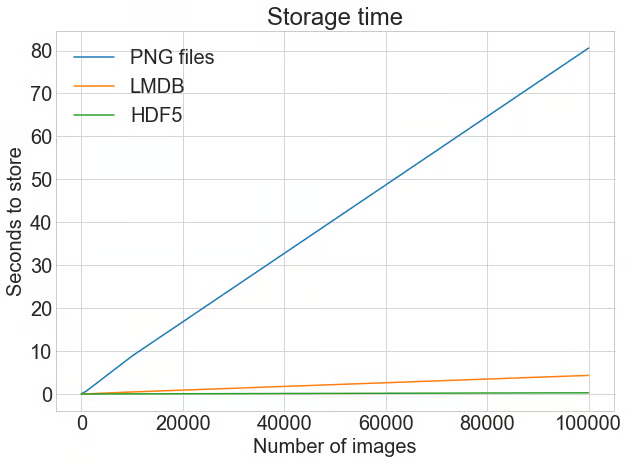

Berdasarkan grafik, dapat diamati beberapa hal berikut:

- Metode penyimpanan PNG memiliki jumlah gambar yang disimpan paling sedikit pada semua waktu penyimpanan. Hal ini kemungkinan karena format file PNG tidak dioptimalkan untuk penyimpanan gambar dalam jumlah besar.

- Metode penyimpanan LMDB memiliki jumlah gambar yang disimpan lebih banyak daripada metode penyimpanan PNG pada semua waktu penyimpanan. Hal ini kemungkinan karena format file LMDB dioptimalkan untuk penyimpanan data terstruktur, termasuk gambar.

- Metode penyimpanan HDF5 memiliki jumlah gambar yang disimpan paling banyak pada semua waktu penyimpanan. Hal ini kemungkinan karena format file HDF5 dioptimalkan untuk penyimpanan data ilmiah, termasuk gambar.

Log Storage Time

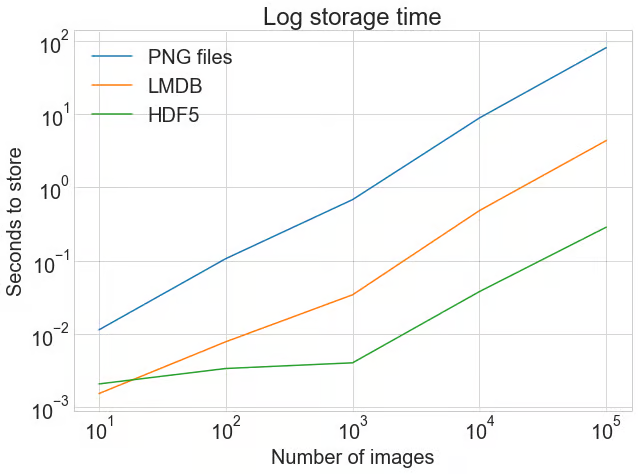


Berdasarkan grafik, dapat diamati beberapa hal berikut:

- Metode penyimpanan PNG memiliki jumlah gambar yang disimpan paling sedikit pada semua waktu penyimpanan. Hal ini kemungkinan karena format file PNG tidak dioptimalkan untuk penyimpanan gambar dalam jumlah besar.

- Metode penyimpanan LMDB memiliki jumlah gambar yang disimpan lebih banyak daripada metode penyimpanan PNG pada semua waktu penyimpanan. Hal ini kemungkinan karena format file LMDB dioptimalkan untuk penyimpanan data terstruktur, termasuk gambar.

- Metode penyimpanan HDF5 memiliki jumlah gambar yang disimpan paling banyak pada semua waktu penyimpanan. Hal ini kemungkinan karena format file HDF5 dioptimalkan untuk penyimpanan data ilmiah, termasuk gambar.

## Percobaan untuk Membaca Banyak Gambar

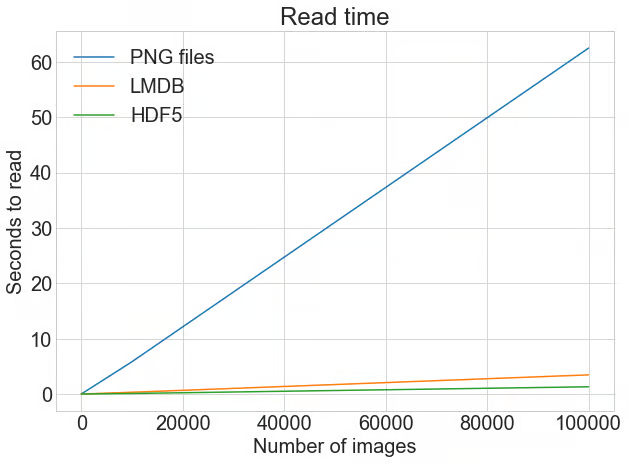

Berdasarkan grafik, dapat diamati beberapa hal berikut:

- Format file PNG memiliki waktu pembacaan yang paling lambat pada semua waktu pembacaan. Hal ini kemungkinan karena format file PNG tidak dioptimalkan untuk pembacaan gambar dalam jumlah besar.

- Format file LMDB memiliki waktu pembacaan yang lebih cepat daripada format file PNG pada semua waktu pembacaan. Hal ini kemungkinan karena format file LMDB dioptimalkan untuk pembacaan data terstruktur, termasuk gambar.

- Format file HDF5 memiliki waktu pembacaan yang paling cepat pada semua waktu pembacaan. Hal ini kemungkinan karena format file HDF5 dioptimalkan untuk pembacaan data ilmiah, termasuk gambar.

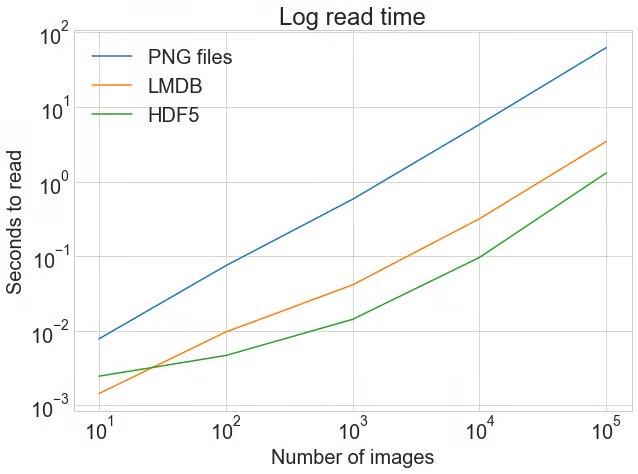

Berdasarkan grafik, dapat diamati beberapa hal berikut:

- Format file PNG memiliki waktu baca terlama pada semua jumlah gambar. Hal ini kemungkinan karena format file PNG tidak dioptimalkan untuk penyimpanan dan pembacaan gambar dalam jumlah besar.

- Format file LMDB memiliki waktu baca yang lebih cepat daripada format file PNG pada semua jumlah gambar. Hal ini kemungkinan karena format file LMDB dioptimalkan untuk penyimpanan dan pembacaan data terstruktur, termasuk gambar.

- Format file HDF5 memiliki waktu baca yang paling cepat pada semua jumlah gambar. Hal ini kemungkinan karena format file HDF5 dioptimalkan untuk penyimpanan dan pembacaan data ilmiah, termasuk gambar.

## Pertimbangan Menggunakan DISK

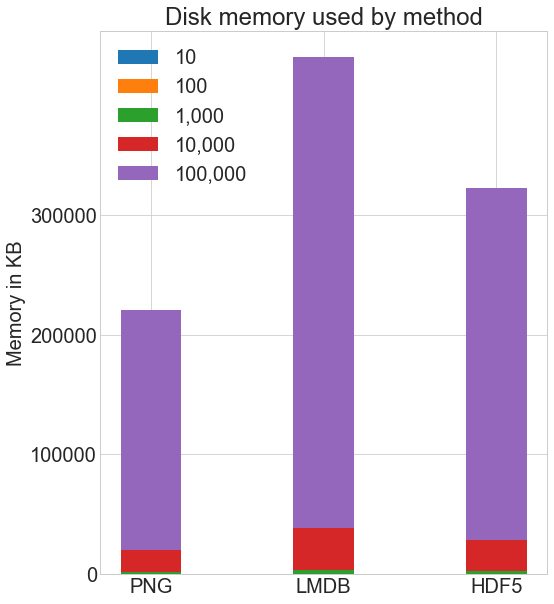

Berdasarkan grafik, dapat diamati beberapa hal berikut:

- Metode penyimpanan PNG menggunakan memori disk paling banyak pada semua jumlah gambar. Hal ini kemungkinan karena format file PNG tidak dioptimalkan untuk penyimpanan gambar dalam jumlah besar.

- Metode penyimpanan LMDB menggunakan memori disk lebih sedikit daripada metode penyimpanan PNG pada semua jumlah gambar. Hal ini kemungkinan karena format file LMDB dioptimalkan untuk penyimpanan data terstruktur, termasuk gambar.

- Metode penyimpanan HDF5 menggunakan memori disk paling sedikit pada semua jumlah gambar. Hal ini kemungkinan karena format file HDF5 dioptimalkan untuk penyimpanan data ilmiah, termasuk gambar.


Baik penggunaan disk maupun kinerja dari HDF5 dan LMDB cenderung lebih besar daripada penyimpanan menggunakan gambar .png biasa. Namun, penggunaan disk maupun kinerja keduanya sangat dipengaruhi oleh berbagai faktor, termasuk sistem operasi dan, yang lebih kritis, ukuran data yang disimpan.
